# Models - HR Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../data/HR_Classification_final.csv")
df

,region,no_of_trainings,previous_year_rating,length_of_service,avg_training_score,is_promoted,Female,Male,awards_0,awards_1,KPI_0,KPI_1,qualification
0,2,1,5.0,8,49,0,1,0,1,0,0,1,0.087045
1,2,1,5.0,4,60,0,0,1,1,0,1,0,0.087045
2,1,1,3.0,7,50,0,0,1,1,0,1,0,0.043523
3,2,2,1.0,10,50,0,0,1,1,0,1,0,0.033851
4,1,1,3.0,2,73,0,0,1,1,0,1,0,0.045940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48602,1,2,1.0,2,49,0,0,1,1,0,1,0,0.080599
48603,1,1,3.0,17,78,0,0,1,1,0,1,0,0.092004
48604,1,1,2.0,6,56,0,1,0,1,0,1,0,0.092365
48605,1,1,5.0,3,79,0,0,1,1,0,0,1,0.087958


In [3]:
y = df['is_promoted']
X = df.drop('is_promoted', axis=1)

### Splitting dataset into Training and testing

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Logistic Regression Classifier

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [7]:
LR_classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
LR_classifier.fit(X_train, y_train)
LR_Predictions = LR_classifier.predict(X_test)

In [8]:
accuracy_score(LR_Predictions, y_test)

0.9142837550572585

In [9]:
LR_ConfusionMatrix = confusion_matrix(LR_Predictions, y_test)
LR_ConfusionMatrix

array([[13254,  1185],
       [   65,    79]], dtype=int64)

<AxesSubplot:>

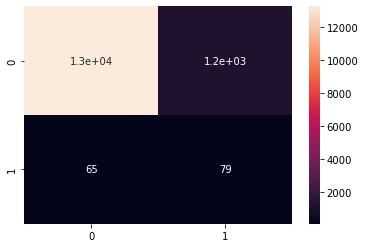

In [10]:
sns.heatmap(LR_ConfusionMatrix, annot=True)

## Decision Trees

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train)
DT_Predictions = DT_classifier.predict(X_test)

In [13]:
accuracy_score(DT_Predictions, y_test)

0.8758828773229103

In [14]:
DT_ConfusionMatrix = confusion_matrix(DT_Predictions, y_test)
DT_ConfusionMatrix

array([[12356,   847],
       [  963,   417]], dtype=int64)

<AxesSubplot:>

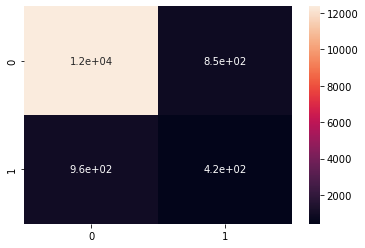

In [15]:
sns.heatmap(DT_ConfusionMatrix, annot=True)

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
RF_Classifier = RandomForestClassifier()
RF_Classifier.fit(X_train, y_train)
RF_Predictions = RF_Classifier.predict(X_test)

In [18]:
accuracy_score(RF_Predictions, y_test)

0.9192210107659604

In [19]:
RF_ConfusionMatrix = confusion_matrix(RF_Predictions, y_test)
RF_ConfusionMatrix

array([[13146,  1005],
       [  173,   259]], dtype=int64)

<AxesSubplot:>

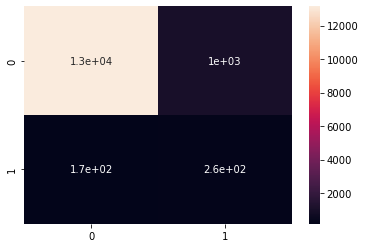

In [20]:
sns.heatmap(RF_ConfusionMatrix, annot=True)

## Naive Bayes

In [21]:
from sklearn.naive_bayes import BernoulliNB

In [22]:
NB_Classifier = BernoulliNB()
NB_Classifier.fit(X_train, y_train)
NB_Predictions = NB_Classifier.predict(X_test)

In [23]:
accuracy_score(NB_Predictions, y_test)

0.910580813275732

In [24]:
NB_ConfusionMatrix = confusion_matrix(NB_Predictions, y_test)
NB_ConfusionMatrix

array([[13134,  1119],
       [  185,   145]], dtype=int64)

<AxesSubplot:>

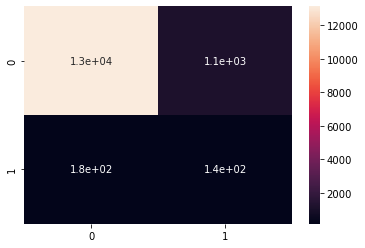

In [25]:
sns.heatmap(NB_ConfusionMatrix, annot=True)

### Best model for this dataset is: Random Forest which gave an accuracy of 91.19%

In [26]:
import pickle

In [27]:
with open('../models/final_model_pkl', 'wb') as files:
    pickle.dump(RF_Classifier, files)

## Testing on unseen data (Not even from the same CSV)

In [28]:
df_test = pd.read_csv('../data/HR_Classification_final_test.csv')

In [29]:
df_test

,region,no_of_trainings,previous_year_rating,length_of_service,avg_training_score,Female,Male,awards_0,awards_1,KPI_0,KPI_1,qualification
0,2,1,3.0,5,51,1,0,1,0,1,0,0.074589
1,1,1,1.0,4,47,0,1,1,0,1,0,0.080590
2,1,3,2.0,9,65,1,0,1,0,1,0,0.088432
3,0,1,4.0,7,61,0,1,1,0,1,0,0.083751
4,2,1,3.0,2,68,0,1,1,0,1,0,0.089106
...,...,...,...,...,...,...,...,...,...,...,...,...
20805,1,1,4.0,2,51,0,1,1,0,1,0,0.080590
20806,1,1,3.0,1,61,0,1,1,0,1,0,0.071515
20807,2,1,3.0,7,74,0,1,1,0,1,0,0.091994
20808,1,1,4.0,4,50,1,0,1,0,1,0,0.075263


In [30]:
with open('../models/final_model_pkl' , 'rb') as f:
    clf = pickle.load(f)
final_predictions = clf.predict(df_test)

In [31]:
final_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
np.sum(final_predictions)

611

In [33]:
len(final_predictions) - np.sum(final_predictions)

20199